In [3]:
from imtools import *

In [4]:
def filtrage(u):
    """
        Filtre -3Dirac(1,-1) + 5Dirac(0,0) - 2Dirac(-1,1)
    """
    return -3 * shift_image(u, 1, -1) + 5 * u - 2 * shift_image(u, -1, 1)

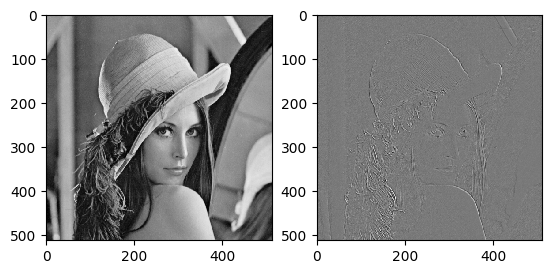

In [5]:
u = open_image('images/lena.png')
v = filtrage(u)
display_images([u, v], lines = 1, columns = 2)

Passons en revue les filtres conv avec noyaux usuels 3x3

In [9]:
# Identité
def identite(u):
    """
        Filtre Dirac(0,0)
    """
    return u

# Netteté
def nettete(u):
    """
        Filtre 5*Dirac(0,0) - Dirac(1,0) - Dirac(0,1) - Dirac(-1,0) - Dirac(0,-1)
    """
    return 5 * u - shift_image(u, 1, 0) - shift_image(u, 0, 1) - shift_image(u, -1, 0) - shift_image(u, 0, -1)

# Flou en boite
def flou(u):
    """
        Filtre 1/9(Dirac(0,0) + Dirac(1,0) + Dirac(0,1) + Dirac(-1,0) + Dirac(0,-1) + Dirac(1,1) + Dirac(-1,1) + Dirac(1,-1) + Dirac(-1,-1))
    """
    return (u + shift_image(u, 1, 0) + shift_image(u, 0, 1) + shift_image(u, -1, 0) + shift_image(u, 0, -1) + shift_image(u, 1, 1) + shift_image(u, -1, 1) + shift_image(u, 1, -1) + shift_image(u, -1, -1)) / 9

# Flou gaussien
def gauss(u):
    """
        Filtre 1/16(Dirac(0,0) + 2*Dirac(1,0) + Dirac(2,0) + 2*Dirac(0,1) + 4*Dirac(1,1) + 2*Dirac(2,1) + Dirac(0,2) + 2*Dirac(1,2) + Dirac(2,2))
    """
    return (u + 2 * shift_image(u, 1, 0) + shift_image(u, 2, 0) + 2 * shift_image(u, 0, 1) + 4 * shift_image(u, 1, 1) + 2 * shift_image(u, 2, 1) + shift_image(u, 0, 2) + 2 * shift_image(u, 1, 2) + shift_image(u, 2, 2)) / 16

# Laplacien
def laplacien(u):
    """
        Filtre -4*Dirac(0,0) + Dirac(1,0) + Dirac(0,1) + Dirac(-1,0) + Dirac(0,-1)
    """
    return -4 * u + shift_image(u, 1, 0) + shift_image(u, 0, 1) + shift_image(u, -1, 0) + shift_image(u, 0, -1)

# Sobel
def sobel(u):
    """
        Filtre -2*Dirac(0,0) + Dirac(1,0) + Dirac(0,1) + Dirac(-1,0) + Dirac(0,-1)
    """
    return -2 * u + shift_image(u, 1, 0) + shift_image(u, 0, 1) + shift_image(u, -1, 0) + shift_image(u, 0, -1)

# Prewitt
def prewitt(u):
    """
        Filtre -2*Dirac(0,0) + Dirac(1,0) + Dirac(0,1) + Dirac(-1,0) + Dirac(0,-1)
    """
    return -2 * u + shift_image(u, 1, 0) + shift_image(u, 0, 1) + shift_image(u, -1, 0) + shift_image(u, 0, -1)

# Roberts
def roberts(u):
    """
        Filtre -2*Dirac(0,0) + Dirac(1,0) + Dirac(0,1) + Dirac(-1,0) + Dirac(0,-1)
    """
    return -2 * u + shift_image(u, 1, 0) + shift_image(u, 0, 1) + shift_image(u, -1, 0) + shift_image(u, 0, -1)

# Detection de contours
def contours(u):
    """
        Filtre -4*Dirac(0,0) + Dirac(1,0) + Dirac(0,1) + Dirac(-1,0) + Dirac(0,-1)
    """
    return -4 * u + shift_image(u, 1, 0) + shift_image(u, 0, 1) + shift_image(u, -1, 0) + shift_image(u, 0, -1)

def contours2(u):
    """ 
        Filtre 8*Dirac(0,0) - Dirac(1,0) - Dirac(0,1) - Dirac(-1,0) - Dirac(0,-1) - Dirac(1,1) - Dirac(-1,1) - Dirac(1,-1) - Dirac(-1,-1)
    """
    return 8 * u - shift_image(u, 1, 0) - shift_image(u, 0, 1) - shift_image(u, -1, 0) - shift_image(u, 0, -1) - shift_image(u, 1, 1) - shift_image(u, -1, 1) - shift_image(u, 1, -1) - shift_image(u, -1, -1)

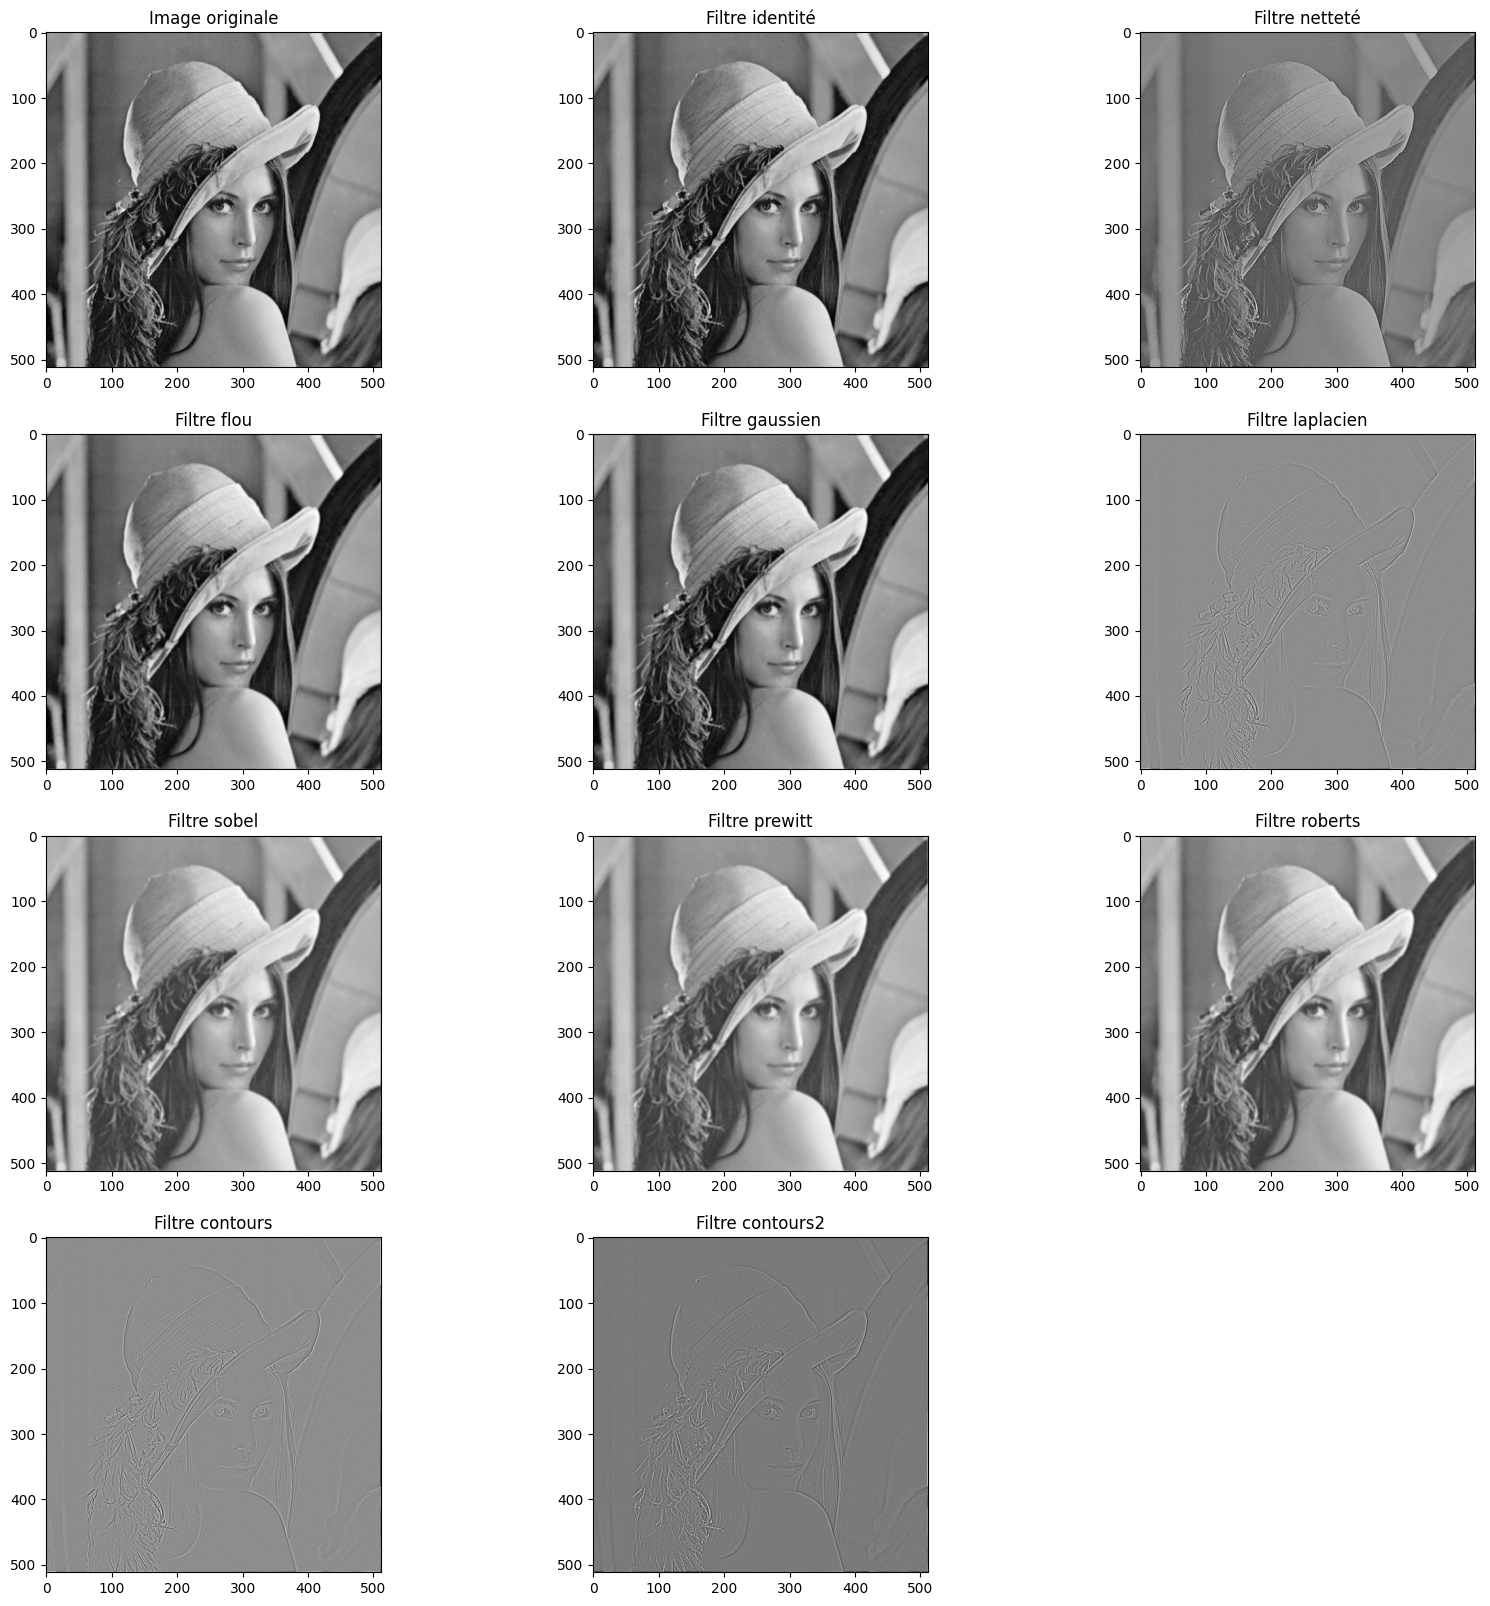

In [10]:
# Display all the filters
u = open_image('images/lena.png')
v = identite(u)
w = nettete(u)
x = flou(u)
y = gauss(u)
z = laplacien(u)
a = sobel(u)
b = prewitt(u)
c = roberts(u)
d = contours(u)
e = contours2(u)

plt.figure(figsize=(20, 20))
plt.subplot(4, 3, 1)
plt.imshow(u, cmap='gray')
plt.title('Image originale')
plt.subplot(4, 3, 2)
plt.imshow(v, cmap='gray')
plt.title('Filtre identité')
plt.subplot(4, 3, 3)
plt.imshow(w, cmap='gray')
plt.title('Filtre netteté')
plt.subplot(4, 3, 4)
plt.imshow(x, cmap='gray')
plt.title('Filtre flou')
plt.subplot(4, 3, 5)
plt.imshow(y, cmap='gray')
plt.title('Filtre gaussien')
plt.subplot(4, 3, 6)
plt.imshow(z, cmap='gray')
plt.title('Filtre laplacien')
plt.subplot(4, 3, 7)
plt.imshow(a, cmap='gray')
plt.title('Filtre sobel')
plt.subplot(4, 3, 8)
plt.imshow(b, cmap='gray')
plt.title('Filtre prewitt')
plt.subplot(4, 3, 9)
plt.imshow(c, cmap='gray')
plt.title('Filtre roberts')
plt.subplot(4, 3, 10)
plt.imshow(d, cmap='gray')
plt.title('Filtre contours')
plt.subplot(4, 3, 11)
plt.imshow(e, cmap='gray')
plt.title('Filtre contours2')
plt.show()



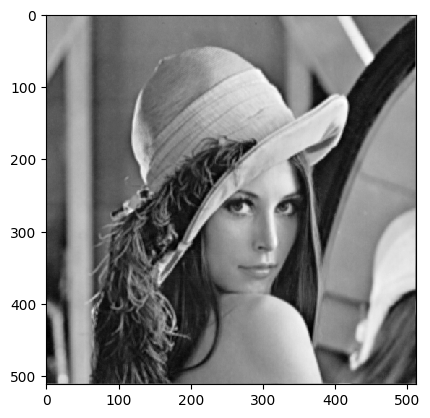

In [8]:
def laplacian(u):
    v = np.zeros(u.shape)
    for x in range(-1, 2):
        for y in range(-1, 2):
            if x == 0 and y == 0:
                r = -1
            else:
                r = 1

            v += r * shift_image(u, x, y)
    return v

display_image(laplacian(u))